In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


Using TensorFlow backend.


In [3]:
#conv layers
model = Sequential()
#model.add(Conv2D(64, (3, 3), input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))

 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [4]:
#fully connected layers
model.add(Flatten())  
 
model.add(Dense( activation = 'relu', units=64))

model.add(Dense( activation = 'softmax', units=3)) 
 


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_set = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        class_mode='categorical')

Found 1050 images belonging to 3 classes.


In [9]:
test_set = test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        class_mode='categorical')

Found 105 images belonging to 3 classes.


In [10]:
model.fit_generator(
        train_set,
        epochs=1,
        validation_data=test_set)



Epoch 1/1
33/33 [==============================] - 49s 1s/step - loss: 0.8793 - accuracy: 0.5895 - val_loss: 0.7868 - val_accuracy: 0.6762


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [12]:
train_set.class_indices

{'airplane': 0, 'cars': 1, 'motorbike': 2}

In [13]:
label_map = (train_set.class_indices)
print(label_map)

{'airplane': 0, 'cars': 1, 'motorbike': 2}


In [155]:
import cv2
import numpy as np



In [156]:
#Prediction

In [16]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('data/test/airplane/plane_360.jpeg'
                           ,target_size =(150,150))


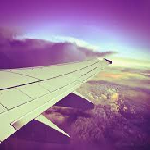

In [17]:
test_image

In [18]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [19]:
test_image.shape

(150, 150, 3)

In [20]:
test_image=test_image.reshape(1,150, 150, 3)

In [21]:
## For single prediction change the dimension using axis. To remove problem of batch
#test_image = np.expand_dims(test_image,axis = 0)
result = model.predict(test_image)

In [22]:
np.around(result)

array([[1., 0., 0.]], dtype=float32)

In [23]:
result=result.argmax()

In [24]:
result

0

In [25]:
## Class label of vehicle

if result == 0:
    prediction = 'airplane'
elif result == 1:
    prediction = 'car'
else:
    prediction = 'bike'
    

In [26]:
prediction

'airplane'